### In the previous session (3A) we had a huge overfit over cat and dog dataset. Our solution to this matter is Data Augmentation. We are going to create new images from previous images by for exampel color shifting, cropping, mirroring, stretching, shearing and so forth.

In [ ]:
!unzip /content/train.zip
!unzip /content/validation.zip
!unzip /content/test.zip

In [2]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [ ]:
!pip install optimizers

In [4]:
dataGenerator = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

### Let's see the augmentation below

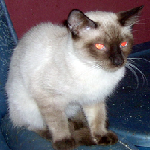

In [5]:
from keras.preprocessing import image

fnames = [os.path.join("/content/train/cats", fname) for fname in os.listdir("/content/train/cats")]

# We pick one image to "augment"
img_path = fnames[28]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))
img

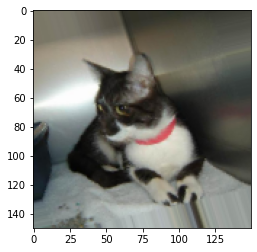

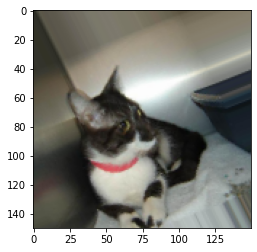

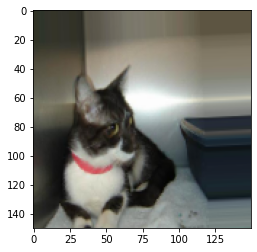

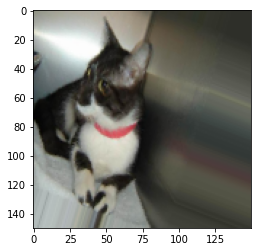

In [6]:
from keras.preprocessing import image

fnames = [os.path.join("/content/train/cats", fname) for fname in os.listdir("/content/train/cats")]

# We pick one image to "augment"
img_path = fnames[9]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop for an unlimited time, so we need to `break` the loop at some point!
i = 0
for batch in dataGenerator.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

### Now our CNN model

In [7]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(learning_rate = 1e-4), metrics = ['acc'])

In [10]:
train_dataGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

### Note that the validation data should not be augmented

In [11]:
test_dataGenerator = ImageDataGenerator(rescale=1./255)

In [19]:
train_generator = train_dataGenerator.flow_from_directory(
        # This is the target directory
        "/content/train",
        # All images will be resized to 150x150
        target_size = (150, 150),
        batch_size = 20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [20]:
validation_generator = test_dataGenerator.flow_from_directory(
        "/content/validation",
        target_size = (150, 150),
        batch_size = 20,
        class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [21]:
memoryM = model.fit_generator(
      train_generator,
      steps_per_epoch = 100,
      epochs = 100,
      validation_data = validation_generator,
      validation_steps = 50)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


100/100 [==============================] - 18s 174ms/step - loss: 0.6815 - acc: 0.5710 - val_loss: 0.6689 - val_acc: 0.5620
Epoch 2/100
100/100 [==============================] - 18s 176ms/step - loss: 0.6741 - acc: 0.5830 - val_loss: 0.6470 - val_acc: 0.6400
Epoch 3/100
100/100 [==============================] - 18s 181ms/step - loss: 0.6639 - acc: 0.5995 - val_loss: 0.6548 - val_acc: 0.6010
Epoch 4/100
100/100 [==============================] - 18s 176ms/step - loss: 0.6478 - acc: 0.6130 - val_loss: 0.6651 - val_acc: 0.6030
Epoch 5/100
100/100 [==============================] - 17s 174ms/step - loss: 0.6492 - acc: 0.6185 - val_loss: 0.6223 - val_acc: 0.6420
Epoch 6/100
100/100 [==============================] - 18s 175ms/step - loss: 0.6416 - acc: 0.6275 - val_loss: 0.6100 - val_acc: 0.6550
Epoch 7/100
100/100 [==============================] - 17s 175ms/step - loss: 0.6335 - acc: 0.6335 - val_loss: 0.6105 - val_acc: 0.6620
Epoch 8/100
100/100 [==============================] - 17s 1

In [22]:
model.save('cats_and_dogs_CNN_model.h5')

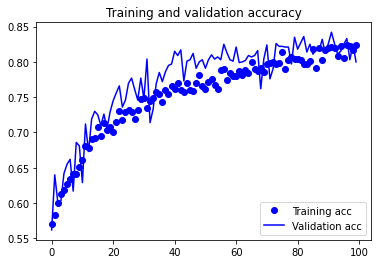

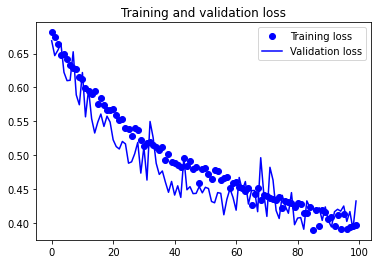

In [23]:
acc = memoryM.history['acc']
val_acc = memoryM.history['val_acc']
loss = memoryM.history['loss']
val_loss = memoryM.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()